# Assignment I: Scraping, Twitter API & Pandas

### Name: Thomas Saltos

## Part 1: Scraping Twitter Accounts

- A `config.py` file is used to hold twitter api keys.
- Top 10 trends are printed.

In [125]:
import tweepy
import json

from twitter_config import config

auth = tweepy.OAuthHandler(config['consumer_key'], config['consumer_secret'])
auth.set_access_token(config['access_token'], config['access_token_secret'])

api = tweepy.API(auth)

ATHENS_WOE_ID = 946738
 
athens_trends = api.trends_place(ATHENS_WOE_ID)
 
trends = json.loads(json.dumps(athens_trends, indent=1))
for trend in trends[0]["trends"][:10]:
	print (trend["name"])

#kalytera
Γιαννιτσα
Φολεγανδρο
#stinigiamas
#XANOLY
#adinamoskrikosgr
Κυριακης
#annitakoita
ξανθη
20 Νοεμβριου


### 1.2 Username Scraping

All usernames are inside the divs with class `slide-layout clearfix`. Then each paragraph with link has a username.
Some paragraphs are null (an if statement is required).

In [126]:
import requests
from bs4 import BeautifulSoup

usernames = []

r = requests.get("https://www.businessinsider.com/uk-politics-twitter-accounts-2016-8?r=US&IR=T")

html = r.content
soup = BeautifulSoup(html, 'html.parser')
divs = soup.find_all('div',{"class": "slide-layout clearfix"})
name_list = soup.find("p")
for review_title in divs:
    name_list = review_title.p.a
    if name_list is None:
        usernames.append(review_title.p.get_text().replace("Handle: ", ""))
    else:
        usernames.append(name_list.get_text())
usernames

['@Tom_Slater_',
 '@MattSingh_',
 '@asabenn',
 '@robfordmancs',
 '@LadPolitics',
 '@samgadjones',
 '@PaulbernalUK',
 '@youngvulgarian',
 '@JolyonMaugham',
 '@IanDunt',
 '@BethRigby',
 '@PatrickStrud',
 '@NadineDorriesMP',
 '@jreedmp',
 '@stephenkb',
 '@AbiWilks',
 '@jessphillips\xa0',
 '@SamCoatesTimes',
 '@toadmeister',
 '@georgeeaton',
 '@jimwaterson',
 '@RuthDavidsonMSP',
 '@DavidAllenGreen',
 '@JuliaHB1',
 '@DavidLammy',
 '@DPJHodges',
 '@LouiseMensch',
 '@montie',
 '@britainelects',
 '@ShippersUnbound',
 '@JamieRoss7',
 '@DouglasCarswell',
 '@SophyRidgeSky',
 '@sunny_hundal',
 '@MrHarryCole',
 '@MichaelLCrick',
 '@Kevin_Maguire',
 '@JohnRentoul',
 '@stellacreasy',
 '@GuidoFawkes',
 '@tom_watson\xa0',
 '@faisalislam\xa0',
 '@paulmasonnews\xa0',
 '@MhairiBlack',
 '@OwenJones84',
 '@suttonnick',
 '@afneil',
 '@paulwaugh',
 '@bbclaurak']

### 1.3 Fetch Tweets

* Last 24 hours: `datetime.now() - timedelta(days=1)`
* For each username fetch tweets
* Compare the two timestamps (status.created_at and end_date)

In [127]:
from datetime import datetime, date, time, timedelta
from tweepy import Cursor

end_date = datetime.now() - timedelta(days=1)
tweet_count = 0
for username in usernames:
    try:
        for status in Cursor(api.user_timeline, id=username, include_rts=False).items():
            tweet_count += 1
            if status.created_at < end_date:
                break
        print(username, tweet_count)
        tweet_count = 0
    except Exception as e :
        print("Cound not fetch {}".format(username))

@Tom_Slater_ 1
@MattSingh_ 19
@asabenn 1
@robfordmancs 45
@LadPolitics 4
@samgadjones 1
@PaulbernalUK 57
@youngvulgarian 14
@JolyonMaugham 37
@IanDunt 15
@BethRigby 3
@PatrickStrud 2
Cound not fetch @NadineDorriesMP
Cound not fetch @jreedmp
@stephenkb 9
@AbiWilks 28
Cound not fetch @jessphillips 
@SamCoatesTimes 1
@toadmeister 5
@georgeeaton 3
@jimwaterson 15
@RuthDavidsonMSP 2
@DavidAllenGreen 1
@JuliaHB1 5
@DavidLammy 5
@DPJHodges 40
@LouiseMensch 72
@montie 1
@britainelects 5
@ShippersUnbound 15
@JamieRoss7 1
@DouglasCarswell 12
@SophyRidgeSky 4
@sunny_hundal 15
@MrHarryCole 10
@MichaelLCrick 15
@Kevin_Maguire 2
@JohnRentoul 62
@stellacreasy 11
@GuidoFawkes 40
Cound not fetch @tom_watson 
Cound not fetch @faisalislam 
Cound not fetch @paulmasonnews 
@MhairiBlack 2
@OwenJones84 5
@suttonnick 1
@afneil 1
@paulwaugh 2
@bbclaurak 1


## Part 2: Proccessing Twitter Accounts

### 2.1 Scrape and Put in a DataFrame
- A list is used for each row of the html table.
- The list is converted to a list of lists.
- A dataframe with name `df` is created.

In [6]:
import pandas as pd

html = requests.get("https://www.mpsontwitter.co.uk/list").content

soup = BeautifulSoup(html, 'html.parser')
rows = soup.find_all('td')
l = []
for row in rows:
    l.append(row.get_text())
#remove empty characters
l = list(filter(None, l))
#convert flat list to list of lists
l = zip(*[iter(l)]*7)
l = list(l)
df = pd.DataFrame(l, columns=["id", "name", "username", "constituency", "party", "num_followers", "new_followers"])
df.drop(["id", "new_followers"], axis=1, inplace=True)
#replace , with empty character and convert num_followers to int
df['num_followers'] = pd.Series(df['num_followers']).str.replace(',', '').astype(int)
df.head()

,name,username,constituency,party,num_followers
0,Adam Afriyie,@AdamAfriyie,Windsor,Conservative,14961
1,Alan Duncan,@AlanDuncanMP,Rutland and Melton,Conservative,26121
2,Alan Mak,@AlanMakMP,Havant,Conservative,8346
3,Alberto Costa,@AlbertoCostaMP,South Leicestershire,Conservative,8998
4,Alec Shelbrooke,@AlecShelbrooke,Elmet and Rothwell,Conservative,15096


### 2.2 Create a Hierarchical Index

In [7]:
df.set_index(['party', 'num_followers']).drop(['name', 'constituency'], axis=1)

username
party                 num_followers                  
Conservative          14961              @AdamAfriyie
                      26121             @AlanDuncanMP
                      8346                 @AlanMakMP
                      8998            @AlbertoCostaMP
                      15096           @AlecShelbrooke
...                                               ...
The Independent Group 20665             @anncoffey_mp
                      198001             @Anna_Soubry
                      51744            @ChrisLeslieMP
                      19509          @joanryanEnfield
                      42869                @MikeGapes

[587 rows x 1 columns]

### 2.3 Assess the Party Twitter Power

Number of followers foreach party.

In [8]:
df_twitter_power = df.groupby(['party'], as_index=False).agg({'num_followers':'sum'})
df_twitter_power

,party,num_followers
0,Conservative,7615013
1,Democratic Unionist Party,98010
2,Green Party,431556
3,Independent,1254400
4,Labour,10865391
5,Liberal Democrat,1447445
6,Plaid Cymru,38810
7,Scottish National Party,787237
8,Sinn Fein,69629
9,The Independent Group,332788


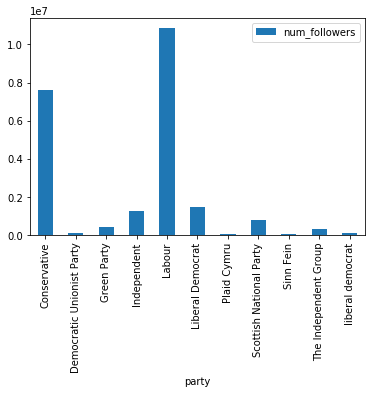

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df_twitter_power.plot(x='party', y='num_followers', kind='bar')

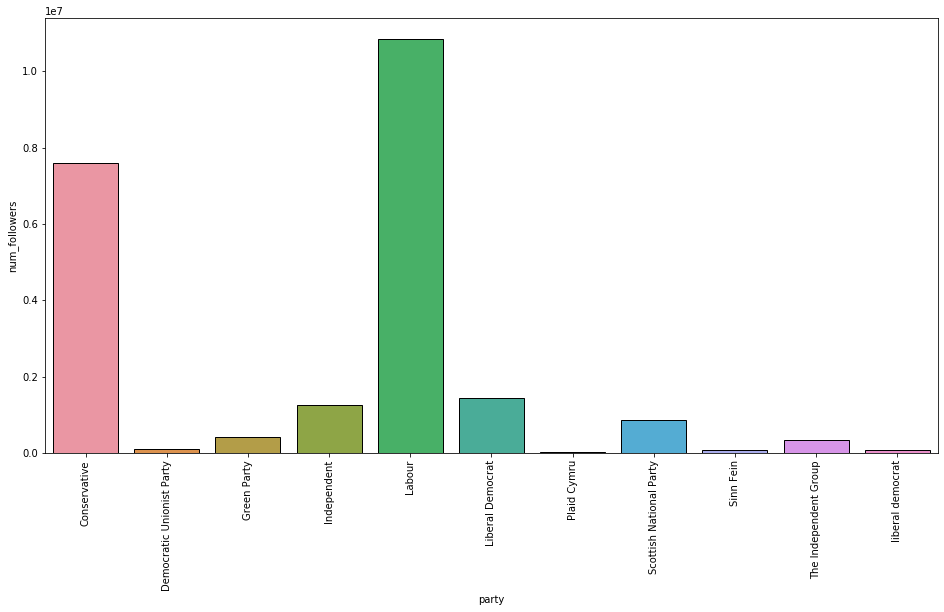

In [26]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation='vertical')
ax = sns.barplot(x='party', y='num_followers',
                 edgecolor='black',
                 data=df_twitter_power)

## Part 3: Processing Text Content

### 3.1 Prepare a Profanity Set

- `urllib` is used to fetch the data.
- Split each line in the `\n` and `\t` characters.
- The list `words` contains the first word of each line.
- Only the top (404 terms) and the bottom (388 terms) list is saved.
- 792 abuse terms

In [124]:
import urllib.request

url = 'http://staffwww.dcs.shef.ac.uk/people/G.Gorrell/publications-materials/abuse-terms.txt'
data = urllib.request.urlopen(url)
words = []
abuse_words = []
for line in data:
    #clear noise
    words.append(line.decode('utf-8').split('\n', 1)[0].split('\t', 1)[0])
#save only abuse terms
abuse_words = words[24:428] + words[433:821]
len(abuse_words)

792

### 3.2 Parse Tweets

In [8]:
#load dataframe from csv
file = "https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv"
df = pd.read_csv(file, index_col=0)

df.rename(columns={'tweet': 'text'}, inplace=True)
df.head()

,count,hate_speech,offensive_language,neither,class,text
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
df['word'] = df['text'].str.split(' ')
df.head()

,count,hate_speech,offensive_language,neither,class,text,word
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,"[!!!!!, RT, @mleew17:, boy, dats, cold...tyga,..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,"[!!!!!!!, RT, @UrKindOfBrand, Dawg!!!!, RT, @8..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s..."
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi..."


### 3.3 Count Abuse

 - The `common_member` function is used to find the number of common terms between two lists.
 - The new column `bad word` contains the number of abuse terms.

In [123]:
def common_member(a, b):
    """
    This function returns the number of
    common elements of two lists
    """
    a_set = set(a) 
    b_set = set(b) 
    # check length  
    return len(a_set.intersection(b_set))

df['bad words'] = (df.apply(lambda x: common_member(x['word'], abuse_words), axis=1))
df.head()

,count,hate_speech,offensive_language,neither,class,text,word,bad words
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,"[!!!, RT, @mayasolovely:, As, a, woman, you, s...",0
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,"[!!!!!, RT, @mleew17:, boy, dats, cold...tyga,...",0
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,"[!!!!!!!, RT, @UrKindOfBrand, Dawg!!!!, RT, @8...",1
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[!!!!!!!!!, RT, @C_G_Anderson:, @viva_based, s...",1
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[!!!!!!!!!!!!!, RT, @ShenikaRoberts:, The, shi...",1


#### Statistics per class

In [11]:
df.groupby('class')['bad words'].agg(['mean', 'median', 'min', 'max', 'sum'])

,mean,median,min,max,sum
class,,,,,
0,0.643357,1,0,10,920
1,0.653465,1,0,5,12540
2,0.037473,0,0,2,156


### 3.4 Visualize Profanity

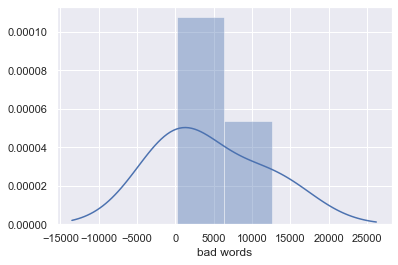

In [108]:
df_bad_words_per_class = df.groupby(['class'], as_index=False).agg({'bad words':'sum'})
sns.set()
ax = sns.distplot(df_bad_words_per_class['bad words'])

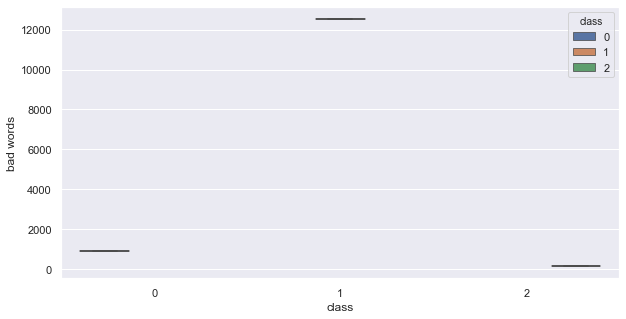

In [117]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='class', y='bad words', hue="class", data=df_bad_words_per_class)

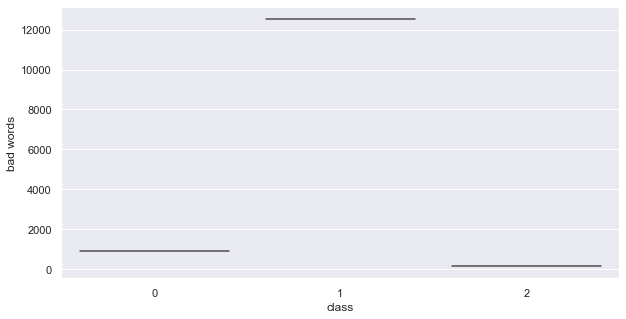

In [122]:
plt.figure(figsize=(10, 5))
ax = sns.violinplot(x='class', y='bad words', data=df_bad_words_per_class)

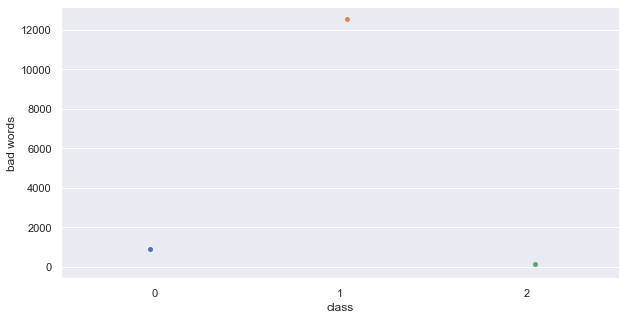

In [19]:
plt.figure(figsize=(10, 5))
ax = sns.stripplot(x='class', y='bad words', data=df_bad_words_per_class)

### 3.5 Explore Profanity per Class

 - First, `common_terms` function is used to find the common terms between two lists.
 - Second, `loc` is used to locate the rows with at least one abuse term.
 - Third, a new collumn is added for the abuse terms at each row.
 - Finally, the dataframe `df_terms_per_class` contains the abuse terms per class.

In [110]:
from collections import Counter

def common_terms(a, b):
    """
    This function returns the
    common terms of two lists
    """
    a_set = set(a) 
    b_set = set(b)   
    return str(" ".join(a_set.intersection(b_set)))

# get rows with abuse terms
df_terms = df.loc[df['bad words']>1]
df_terms['abuse terms'] = (df_terms.apply(lambda x: common_terms(x['word'], abuse_words), axis=1))
df_terms_per_class = df_terms.groupby('class').agg({'abuse terms': lambda x: ' '.join(x)})
df_terms_per_class

,abuse terms
class,
0,die dick pussy spic nigga dicks queer nigga bi...
1,nigga bitch dick bitch bitch pussy nigga pussy...
2,hang beaner


### Top 30 abuse terms per class

`Counter` from Python's `collections` library is used for the 30 most common abuse terms for each class.

In [101]:
#top 30 abuse terms in class 0
Counter(df_terms_per_class.iloc[0]['abuse terms'].split()).most_common(30)

[('bitch', 63),
 ('nigga', 60),
 ('faggot', 18),
 ('pussy', 15),
 ('nigger', 15),
 ('dick', 12),
 ('kill', 11),
 ('die', 8),
 ('bitches', 7),
 ('queer', 6),
 ('coon', 6),
 ('whore', 6),
 ('spic', 5),
 ('cunt', 5),
 ('niggers', 5),
 ('fag', 3),
 ('rape', 3),
 ('slut', 3),
 ('dyke', 3),
 ('dicks', 2),
 ('beaner', 2),
 ('hang', 2),
 ('coward', 2),
 ('chink', 2),
 ('gook', 2),
 ('tranny', 2),
 ('dumbass', 2),
 ('murder', 2),
 ('raped', 2),
 ('fuckboy', 1)]

In [102]:
#top 30 abuse terms in class 1
Counter(df_terms_per_class.iloc[1]['abuse terms'].split()).most_common(30)

[('bitch', 695),
 ('nigga', 536),
 ('bitches', 246),
 ('pussy', 229),
 ('dick', 151),
 ('kill', 58),
 ('die', 30),
 ('faggot', 28),
 ('cunt', 17),
 ('whore', 16),
 ('hang', 16),
 ('fag', 15),
 ('balls', 13),
 ('nigger', 13),
 ('slut', 11),
 ('dumbass', 10),
 ('fucker', 9),
 ('penis', 8),
 ('asshole', 7),
 ('dicks', 7),
 ('retard', 7),
 ('dyke', 7),
 ('dike', 5),
 ('murder', 5),
 ('asses', 5),
 ('rape', 5),
 ('motherfucker', 4),
 ('raped', 4),
 ('pussies', 4),
 ('tranny', 3)]

In [103]:
#top 30 abuse terms in class 2
Counter(df_terms_per_class.iloc[2]['abuse terms'].split()).most_common(30)

[('hang', 1), ('beaner', 1)]